In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from env import get_db_url
import acquire as acq

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df = acq.get_superstore_df()

df.head()

Reading from CSV file...


,Unnamed: 0,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
0,0,1,FUR-BO-10001798,CG-12520,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,261.9600,2.0,0.00,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South
1,1,1,FUR-CH-10000454,CG-12520,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,731.9400,3.0,0.00,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",South
2,2,1,FUR-TA-10000577,SO-20335,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,957.5775,5.0,0.45,-383.0310,Furniture,Tables,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,South
3,3,1,OFF-ST-10000760,SO-20335,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,Sean O'Donnell,Eldon Fold 'N Roll Cart System,South
4,4,1,OFF-PA-10002365,AA-10480,11,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,United States,Concord,North Carolina,28027.0,15.5520,3.0,0.20,5.4432,Office Supplies,Paper,Andrew Allen,Xerox 1967,South


In [3]:
df = df.drop(columns= ['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region ID      1734 non-null   int64  
 1   Product ID     1734 non-null   object 
 2   Customer ID    1734 non-null   object 
 3   Category ID    1734 non-null   int64  
 4   Order ID       1734 non-null   object 
 5   Order Date     1734 non-null   object 
 6   Ship Date      1734 non-null   object 
 7   Ship Mode      1734 non-null   object 
 8   Segment        1734 non-null   object 
 9   Country        1734 non-null   object 
 10  City           1734 non-null   object 
 11  State          1734 non-null   object 
 12  Postal Code    1734 non-null   float64
 13  Sales          1734 non-null   float64
 14  Quantity       1734 non-null   float64
 15  Discount       1734 non-null   float64
 16  Profit         1734 non-null   float64
 17  Category       1734 non-null   object 
 18  Sub-Cate

In [4]:
df = acq.clean_superstore_df(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2014-01-04 to 2017-12-30
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   product_id     1734 non-null   object         
 1   customer_id    1734 non-null   object         
 2   order_id       1734 non-null   object         
 3   order_date     1734 non-null   datetime64[ns] 
 4   ship_date      1734 non-null   datetime64[ns] 
 5   ship_mode      1734 non-null   object         
 6   segment        1734 non-null   object         
 7   country        1734 non-null   object         
 8   city           1734 non-null   object         
 9   state          1734 non-null   object         
 10  postal_code    1734 non-null   int64          
 11  sales          1734 non-null   float64        
 12  quantity       1734 non-null   float64        
 13  discount       1734 non-null   float64        
 14  profit         1734 non-null   float64

In [5]:
# Create separate dfs for product categories
furniture = df.copy()[df.category ==  'Furniture']
ofc_supplies = df.copy()[df.category == 'Office Supplies']
tech = df.copy()[df.category == 'Technology']

### Overall profit margin and profit

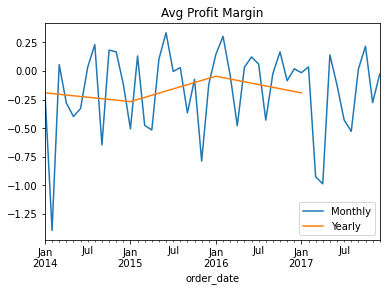

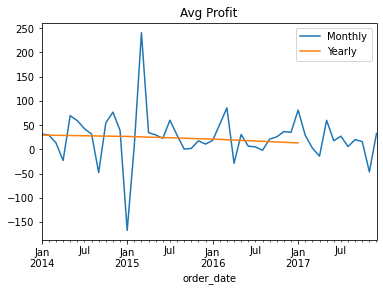

In [6]:
df.resample('M').profit_margin.mean().plot(label= 'Monthly')
df.resample('Y').profit_margin.mean().plot(label= 'Yearly')
plt.title('Avg Profit Margin')
plt.legend()
plt.show()
df.resample('M').profit.mean().plot(label= 'Monthly')
df.resample('Y').profit.mean().plot(label= 'Yearly')
plt.title('Avg Profit')
plt.legend()

### Overall sales and revenue

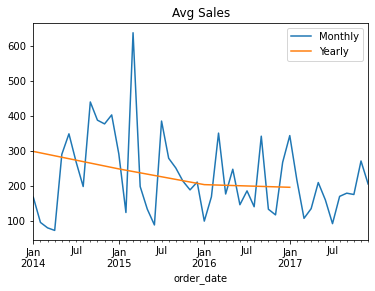

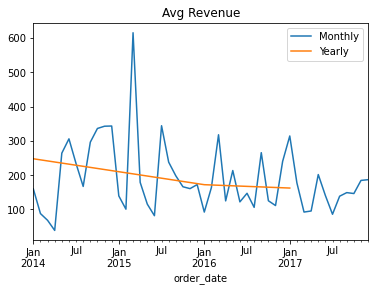

In [7]:
df.resample('M').sales.mean().plot(label= 'Monthly')
df.resample('Y').sales.mean().plot(label= 'Yearly')
plt.title('Avg Sales')
plt.legend()
plt.show()
df.resample('M').revenue.mean().plot(label= 'Monthly')
df.resample('Y').revenue.mean().plot(label= 'Yearly')
plt.title('Avg Revenue')
plt.legend()

### Furniture sales

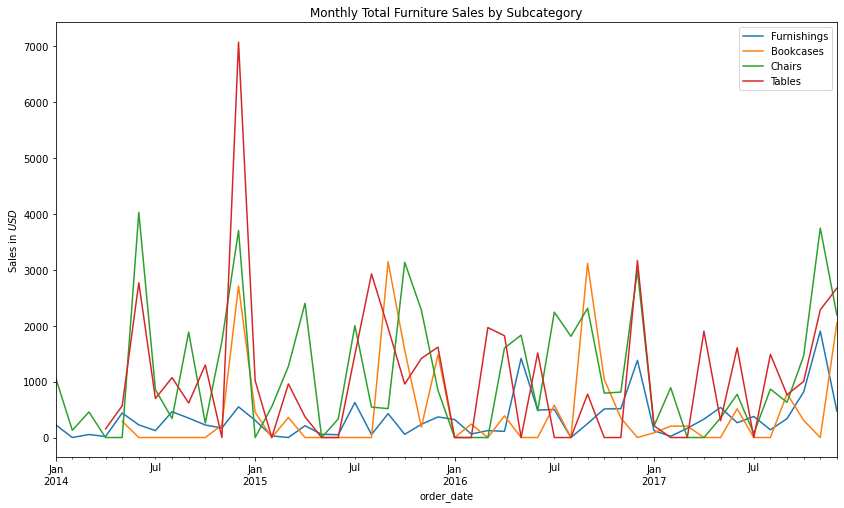

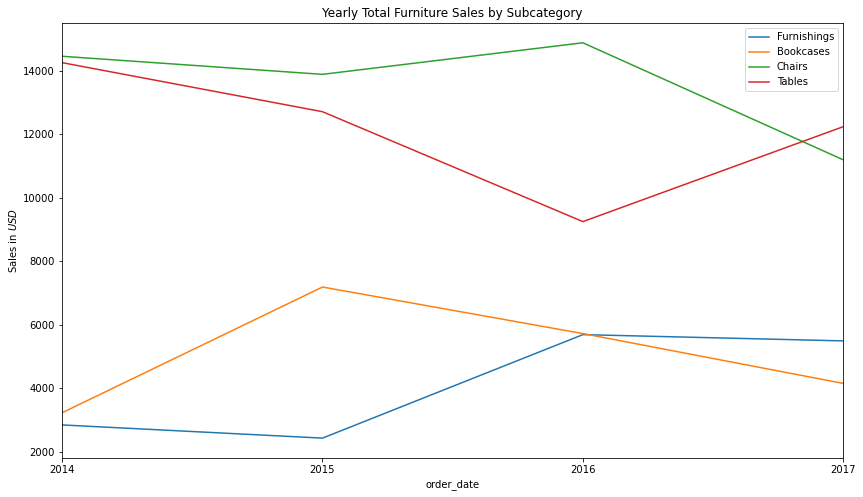

In [9]:
plt.figure(figsize=(14,8))
furniture[furniture.sub_cat == 'Furnishings'].resample('M').sales.sum().plot(label='Furnishings')
furniture[furniture.sub_cat == 'Bookcases'].resample('M').sales.sum().plot(label='Bookcases')
furniture[furniture.sub_cat == 'Chairs'].resample('M').sales.sum().plot(label='Chairs')
furniture[furniture.sub_cat == 'Tables'].resample('M').sales.sum().plot(label='Tables')
plt.ylabel('Sales in $USD$')
plt.title('Monthly Total Furniture Sales by Subcategory')
plt.legend()

plt.show()

plt.figure(figsize=(14,8))
furniture[furniture.sub_cat == 'Furnishings'].resample('Y').sales.sum().plot(label='Furnishings')
furniture[furniture.sub_cat == 'Bookcases'].resample('Y').sales.sum().plot(label='Bookcases')
furniture[furniture.sub_cat == 'Chairs'].resample('Y').sales.sum().plot(label='Chairs')
furniture[furniture.sub_cat == 'Tables'].resample('Y').sales.sum().plot(label='Tables')
plt.ylabel('Sales in $USD$')
plt.title('Yearly Total Furniture Sales by Subcategory')
plt.legend()

### Office Supplies sales

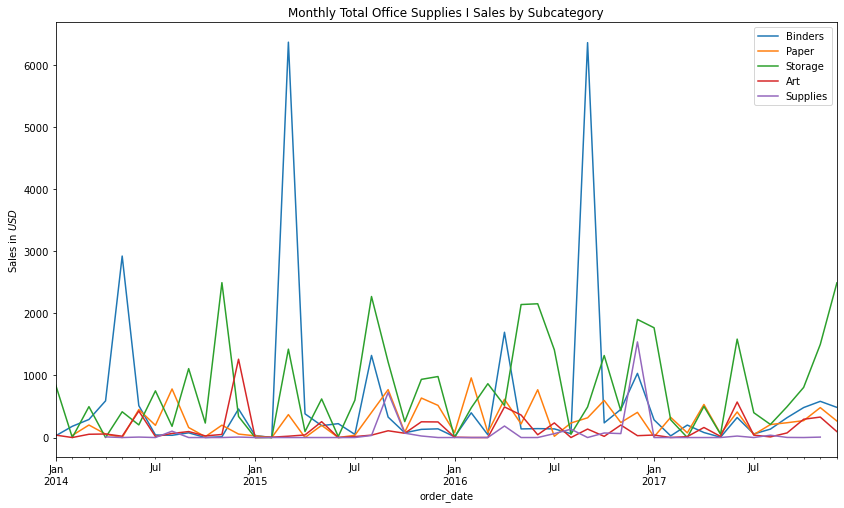

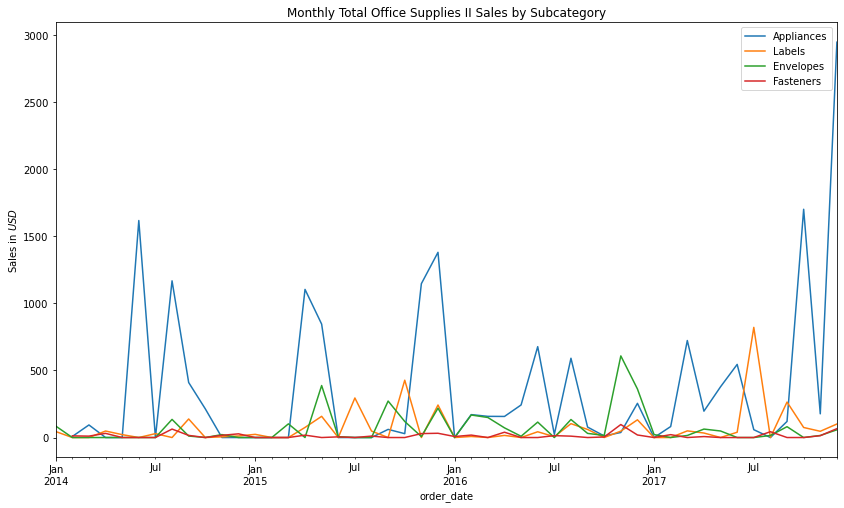

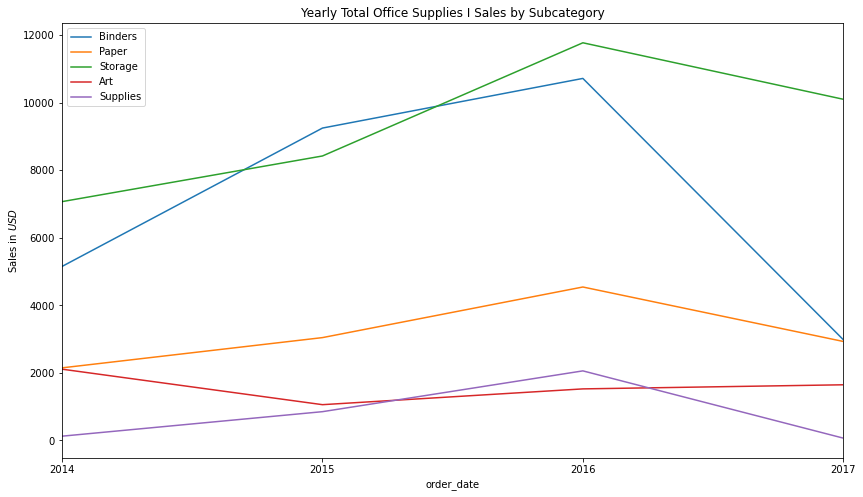

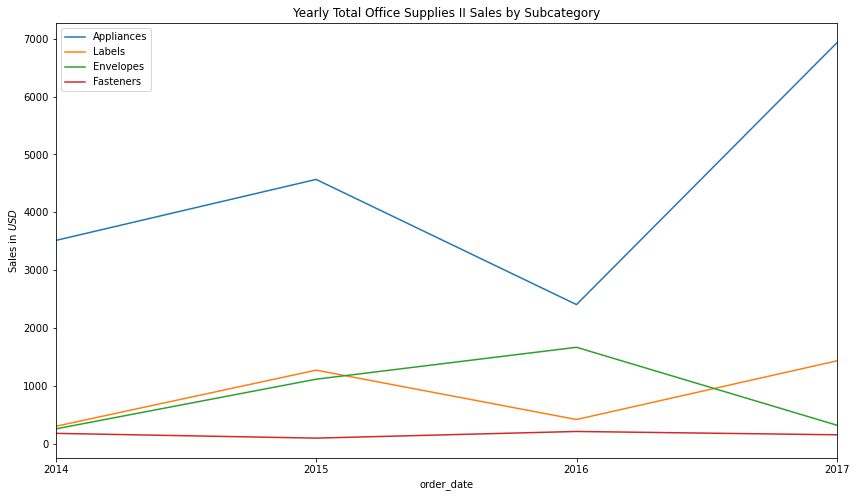

In [11]:
plt.figure(figsize=(14,8))
ofc_supplies[ofc_supplies.sub_cat == 'Binders'].resample('M').sales.sum().plot(label='Binders')
ofc_supplies[ofc_supplies.sub_cat == 'Paper'].resample('M').sales.sum().plot(label='Paper')
ofc_supplies[ofc_supplies.sub_cat == 'Storage'].resample('M').sales.sum().plot(label='Storage')
ofc_supplies[ofc_supplies.sub_cat == 'Art'].resample('M').sales.sum().plot(label='Art')
ofc_supplies[ofc_supplies.sub_cat == 'Supplies'].resample('M').sales.sum().plot(label='Supplies')

plt.ylabel('Sales in $USD$')
plt.title('Monthly Total Office Supplies I Sales by Subcategory')
plt.legend()

plt.show()

plt.figure(figsize=(14,8))
ofc_supplies[ofc_supplies.sub_cat == 'Appliances'].resample('M').sales.sum().plot(label='Appliances')
ofc_supplies[ofc_supplies.sub_cat == 'Labels'].resample('M').sales.sum().plot(label='Labels')
ofc_supplies[ofc_supplies.sub_cat == 'Envelopes'].resample('M').sales.sum().plot(label='Envelopes')
ofc_supplies[ofc_supplies.sub_cat == 'Fasteners'].resample('M').sales.sum().plot(label='Fasteners')

plt.ylabel('Sales in $USD$')
plt.title('Monthly Total Office Supplies II Sales by Subcategory')
plt.legend()

plt.show()

plt.figure(figsize=(14,8))
ofc_supplies[ofc_supplies.sub_cat == 'Binders'].resample('Y').sales.sum().plot(label='Binders')
ofc_supplies[ofc_supplies.sub_cat == 'Paper'].resample('Y').sales.sum().plot(label='Paper')
ofc_supplies[ofc_supplies.sub_cat == 'Storage'].resample('Y').sales.sum().plot(label='Storage')
ofc_supplies[ofc_supplies.sub_cat == 'Art'].resample('Y').sales.sum().plot(label='Art')
ofc_supplies[ofc_supplies.sub_cat == 'Supplies'].resample('Y').sales.sum().plot(label='Supplies')

plt.ylabel('Sales in $USD$')
plt.title('Yearly Total Office Supplies I Sales by Subcategory')
plt.legend()

plt.show()

plt.figure(figsize=(14,8))
ofc_supplies[ofc_supplies.sub_cat == 'Appliances'].resample('Y').sales.sum().plot(label='Appliances')
ofc_supplies[ofc_supplies.sub_cat == 'Labels'].resample('Y').sales.sum().plot(label='Labels')
ofc_supplies[ofc_supplies.sub_cat == 'Envelopes'].resample('Y').sales.sum().plot(label='Envelopes')
ofc_supplies[ofc_supplies.sub_cat == 'Fasteners'].resample('Y').sales.sum().plot(label='Fasteners')

plt.ylabel('Sales in $USD$')
plt.title('Yearly Total Office Supplies II Sales by Subcategory')
plt.legend()

### Technology sales

Accessories    79
Phones         76
Machines       12
Copiers         7

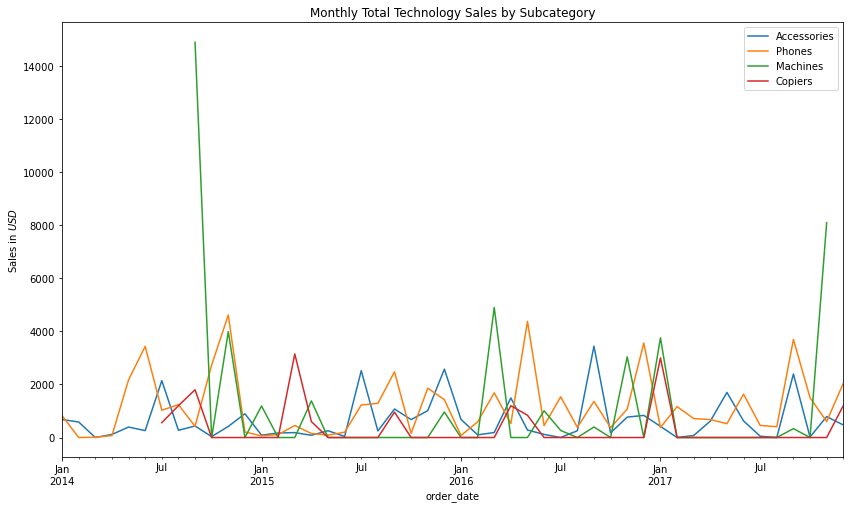

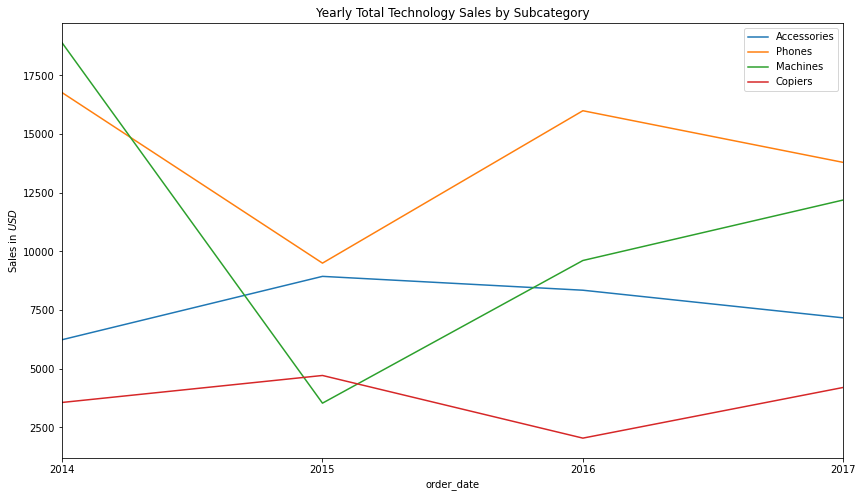

In [13]:
plt.figure(figsize=(14,8))
tech[tech.sub_cat == 'Accessories'].resample('M').sales.sum().plot(label='Accessories')
tech[tech.sub_cat == 'Phones'].resample('M').sales.sum().plot(label='Phones')
tech[tech.sub_cat == 'Machines'].resample('M').sales.sum().plot(label='Machines')
tech[tech.sub_cat == 'Copiers'].resample('M').sales.sum().plot(label='Copiers')
plt.ylabel('Sales in $USD$')
plt.title('Monthly Total Technology Sales by Subcategory')
plt.legend()

plt.show()

plt.figure(figsize=(14,8))
tech[tech.sub_cat == 'Accessories'].resample('Y').sales.sum().plot(label='Accessories')
tech[tech.sub_cat == 'Phones'].resample('Y').sales.sum().plot(label='Phones')
tech[tech.sub_cat == 'Machines'].resample('Y').sales.sum().plot(label='Machines')
tech[tech.sub_cat == 'Copiers'].resample('Y').sales.sum().plot(label='Copiers')
plt.ylabel('Sales in $USD$')
plt.title('Yearly Total Technology Sales by Subcategory')
plt.legend()

### Profits and Margins

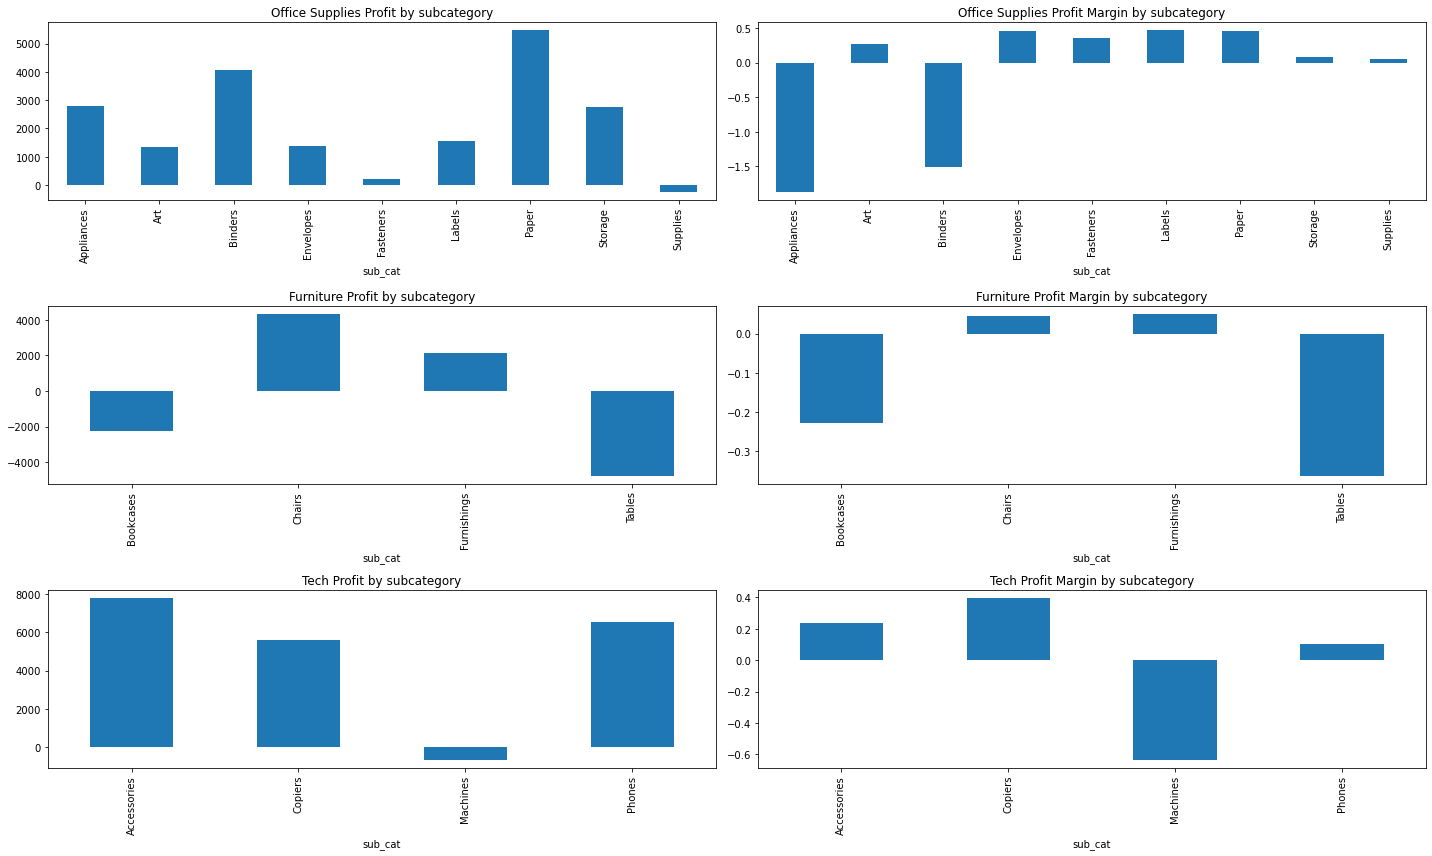

In [22]:
plt.figure(figsize=(20,12))
plt.subplot(321)
ofc_supplies.groupby(ofc_supplies.sub_cat).profit.sum().plot.bar()
plt.title('Office Supplies Profit by subcategory')

plt.subplot(322)
ofc_supplies.groupby(ofc_supplies.sub_cat).profit_margin.mean().plot.bar()
plt.title('Office Supplies Profit Margin by subcategory')

plt.subplot(323)
furniture.groupby(furniture.sub_cat).profit.sum().plot.bar()
plt.title('Furniture Profit by subcategory')

plt.subplot(324)
furniture.groupby(furniture.sub_cat).profit_margin.mean().plot.bar()
plt.title('Furniture Profit Margin by subcategory')


plt.subplot(325)
tech.groupby(tech.sub_cat).profit.sum().plot.bar()
plt.title('Tech Profit by subcategory')

plt.subplot(326)
tech.groupby(tech.sub_cat).profit_margin.mean().plot.bar()
plt.title('Tech Profit Margin by subcategory')

plt.tight_layout()
